In [2]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
source  = '/home/sobolev/nevermind/Andrey/data'

session = '009266_hippoSIT_2023-04-26_08-20-17'  # sample session with some PPC units
#session = '009266_hippoSIT_2023-04-28_09-04-09'
#session = '009266_hippoSIT_2023-05-04_09-11-06'  # coma session with baseline AEPs
animal      = session.split('_')[0]
sessionpath = os.path.join(source, animal, session)
aeps_file = os.path.join(sessionpath, 'AEPs.h5')

with h5py.File(aeps_file, 'r') as f:
    aeps = np.array(f['aeps'])
    aeps_events = np.array(f['aeps_events'])
    
t_N1 = 20  # all in ms
N1_l, N1_r = 15, 25
P1_l, P1_r = 30, 75

len(aeps)

6095

### N1 / P1 Integrals

In [55]:
# normalize to the LFP N1 start
aeps_N1 = np.array([aep - aep[25] for aep in aeps])

In [56]:
aeps_N1_areas = aeps[:, N1_l:N1_r].sum(axis=1)
aeps_P1_areas = aeps[:, P1_l:P1_r].sum(axis=1)

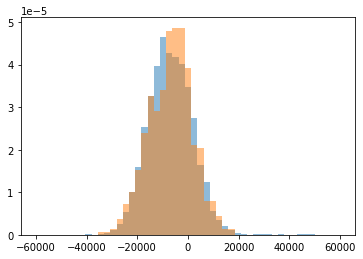

In [57]:
_ = plt.hist(aeps_N1_areas[aeps_events[:, 1] == 1], bins=np.linspace(-60000, 60000, 50), density=True, alpha=0.5)
_ = plt.hist(aeps_N1_areas[aeps_events[:, 1] == 2], bins=np.linspace(-60000, 60000, 50), density=True, alpha=0.5)

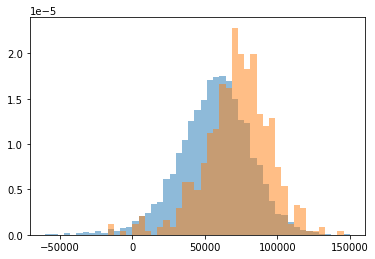

In [59]:
_ = plt.hist(aeps_P1_areas[aeps_events[:, 1] == 1], bins=np.linspace(-60000, 150000, 50), density=True, alpha=0.5)
_ = plt.hist(aeps_P1_areas[aeps_events[:, 1] == 2], bins=np.linspace(-60000, 150000, 50), density=True, alpha=0.5)

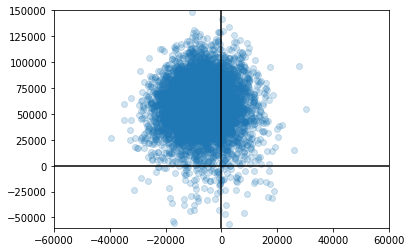

In [63]:
fig, ax = plt.subplots(1, 1)
ax.scatter(aeps_N1_areas, aeps_P1_areas, alpha=0.2)
ax.set_xlim(-60000, 60000)
ax.set_ylim(-60000, 150000)
ax.axhline(0, color='black')
ax.axvline(0, color='black')